# Intro

In this notebook we'll take a look at some visualizations of temperature changes across the world. The temperature measurements found here are relative to a baseline computed from the temperatures between 1951 - 1980. For example a value of 2 indicates a 2°C increase from baseline of the area of interest. Based on current climate research we should expect to see something between a linear and expontial trend upwards.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
 import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

# Primary Cleaning

In [3]:
df = pd.read_csv('dataset/Environment_Temperature_change.csv', encoding='latin-1')
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('y', '')
df.drop(columns=['area code', 'element code', 'months code', 'unit'], inplace = True)
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
# df.months.unique()

In [12]:
df[df['months'] == 'Meteorological year']

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
32,Afghanistan,Meteorological year,Temperature change,-0.080,-0.120,0.882,-0.727,-0.200,0.176,-0.361,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
33,Afghanistan,Meteorological year,Standard Deviation,0.548,0.548,0.548,0.548,0.548,0.548,0.548,...,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548,0.548
66,Albania,Meteorological year,Temperature change,0.631,0.339,0.084,-0.171,-0.392,0.551,-0.084,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
67,Albania,Meteorological year,Standard Deviation,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425
100,Algeria,Meteorological year,Temperature change,0.186,0.101,0.045,0.212,-0.135,0.404,-0.024,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,Annex I countries,Meteorological year,Standard Deviation,0.306,0.306,0.306,0.306,0.306,0.306,0.306,...,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306,0.306
9620,Non-Annex I countries,Meteorological year,Temperature change,0.029,-0.059,0.149,-0.174,-0.092,0.151,-0.190,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361
9621,Non-Annex I countries,Meteorological year,Standard Deviation,0.202,0.202,0.202,0.202,0.202,0.202,0.202,...,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202,0.202
9654,OECD,Meteorological year,Temperature change,0.165,-0.009,0.134,-0.190,-0.385,-0.166,-0.090,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [7]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

In [8]:
seasons_replace = {'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 'Sep\x96Oct\x96Nov': 'Fall', }
df.replace(seasons_replace, inplace=True)

In [9]:
df.months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Winter',
       'Spring', 'Summer', 'Fall', 'Meteorological year'], dtype=object)

# Countries Visualization

These functions will give us region specific dataframes for easy analysis. 

In [10]:
def country_df(df, country):
    dfn = df[(df['element'] == 'Temperature change') & (df['area'] == country)]
    dfn = dfn.set_index('months').transpose()[2:]
    dfn['year'] = dfn.index
    dfn.reset_index(drop=True, inplace=True)
    dfn.index.names = [country]
    dfn = dfn.astype('float')
    return dfn

In [11]:
def seasons_df(df, country):
    dfn = df[(df['element'] == 'Temperature change') & (df['area'] == country)]
    dfn.rename(columns={'months': 'seasons'}, inplace=True)
    dfn = dfn.set_index('seasons').transpose()[2:]
    dfn['year'] = dfn.index
    dfn.drop(columns=months, inplace=True)
    dfn.reset_index(drop=True, inplace=True)
    dfn.index.names = [country]
    dfn = dfn.astype('float')
    return dfn

In [18]:
UK = country_df(df, 'United Kingdom')
UK.head()

months,January,February,March,April,May,June,July,August,September,October,November,December,Winter,Spring,Summer,Fall,Meteorological year,year
United Kingdom,,,,,,,,,,,,,,,,,,
0,-0.053,2.883,2.575,1.517,-0.101,0.073,-0.638,-0.182,1.163,0.188,-0.471,-2.273,0.607,1.330,-0.249,0.293,0.495,1961.0
1,0.705,0.820,-2.649,-0.345,-0.910,-0.514,-1.001,-1.091,-0.868,0.186,-0.823,-1.618,-0.249,-1.301,-0.869,-0.502,-0.730,1962.0
2,-4.397,-3.601,0.363,0.298,-0.697,0.444,-0.613,-1.142,-0.492,0.229,0.856,-1.477,-3.205,-0.012,-0.437,0.198,-0.864,1963.0
3,0.561,0.855,-0.873,0.693,1.512,-0.311,0.048,-0.361,0.267,-1.384,0.796,-1.138,-0.020,0.444,-0.208,-0.107,0.027,1964.0
4,-0.421,-0.221,-0.401,0.060,0.134,0.113,-1.711,-0.688,-0.994,0.374,-1.983,-0.602,-0.593,-0.069,-0.762,-0.868,-0.573,1965.0


This function will let us easily view temperature trends in a country for any of the provided time periods.

In [19]:
def country_plot(data, period):
    p = plt.figure(figsize=(8,8))
    sns.regplot(data=data, x='year', y=period, fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75})
    plt.ylabel('∆ °C', rotation=0)
    plt.title(data.index.name+" in "+period)

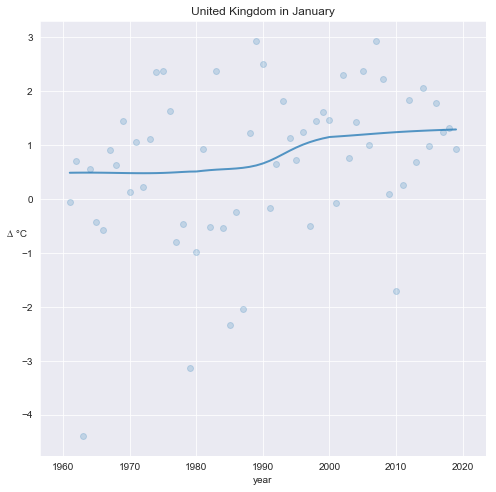

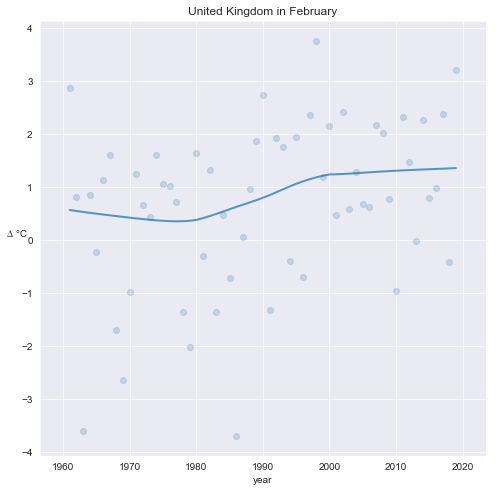

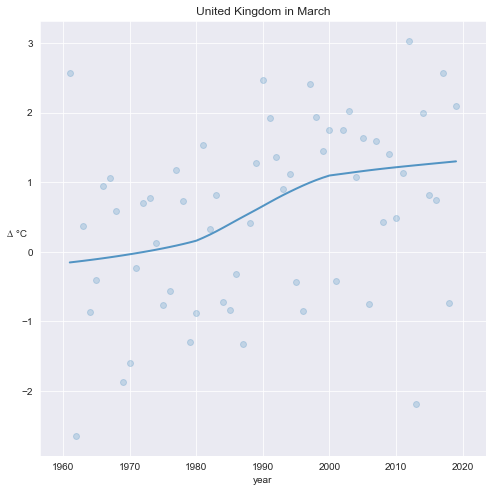

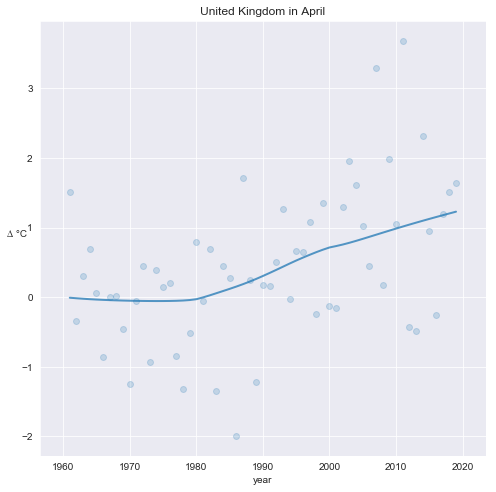

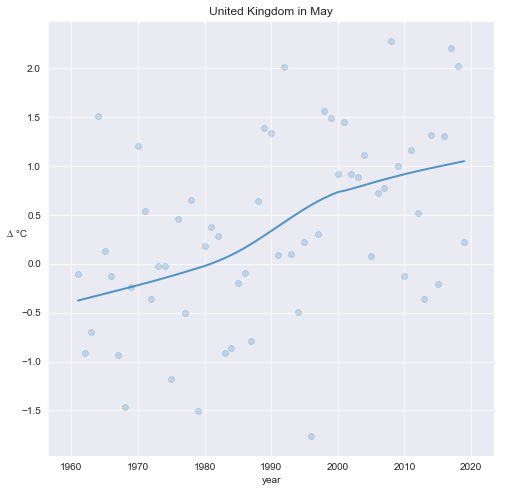

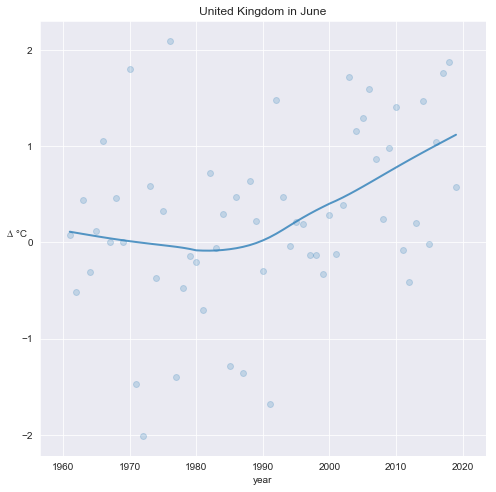

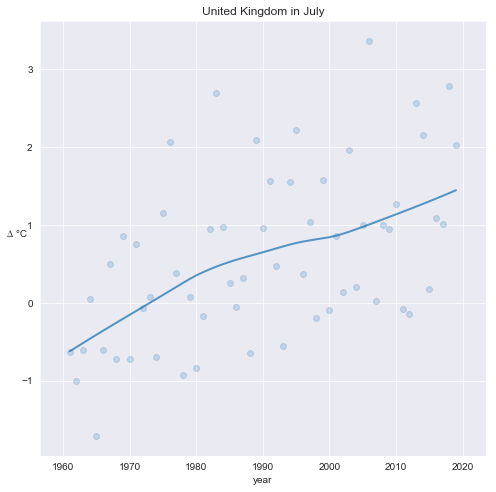

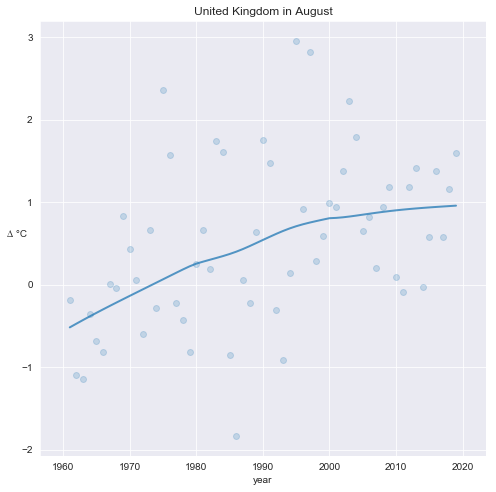

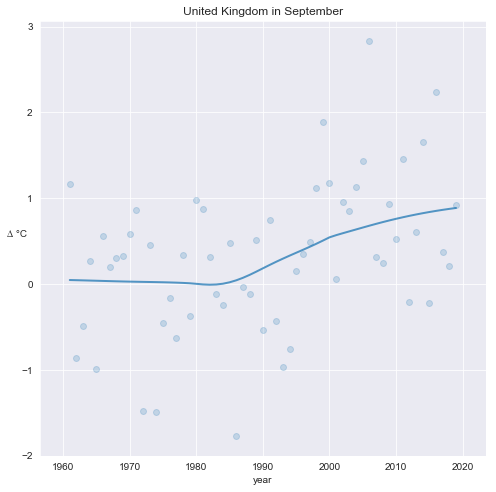

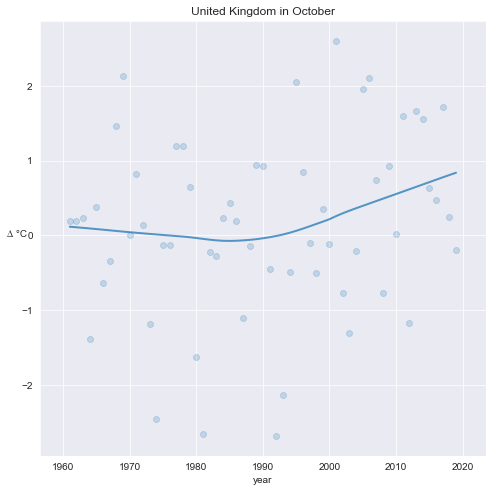

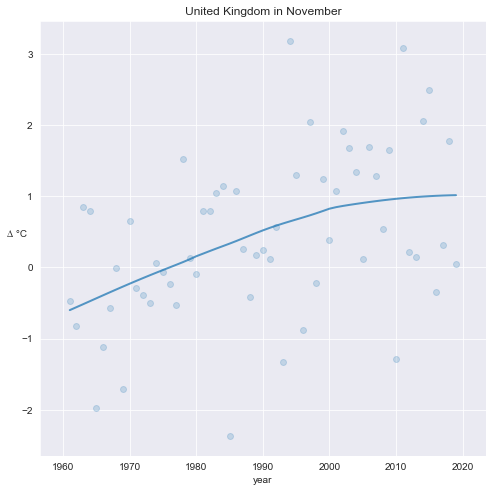

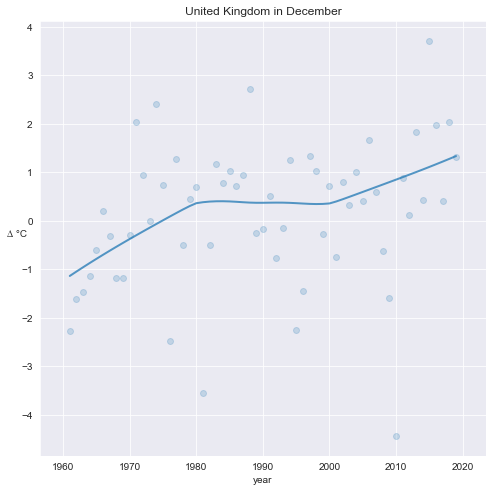

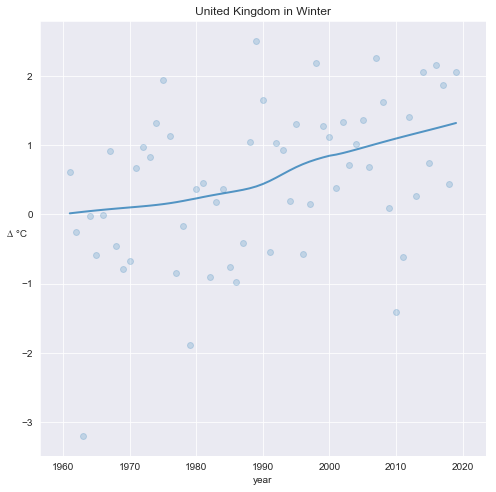

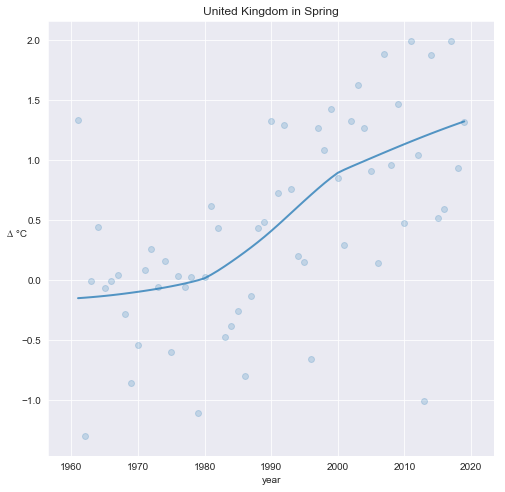

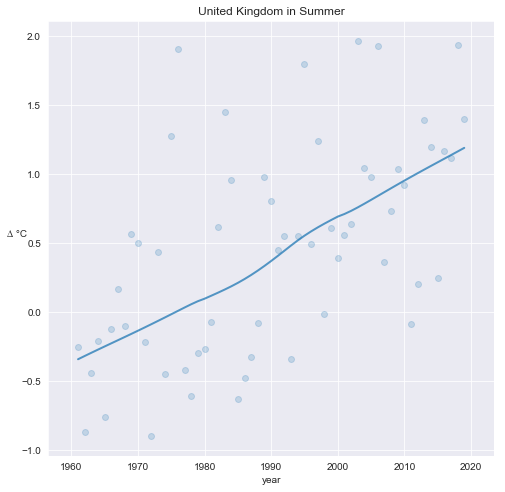

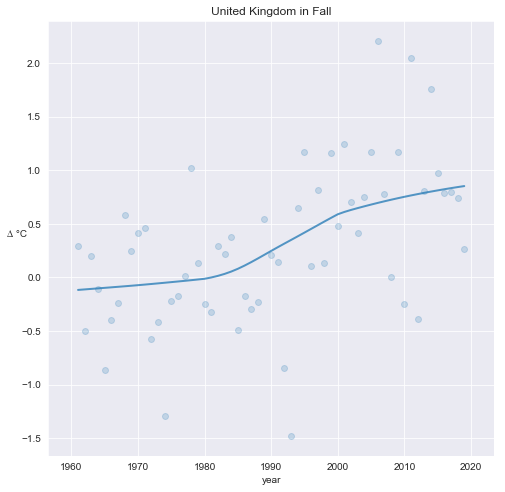

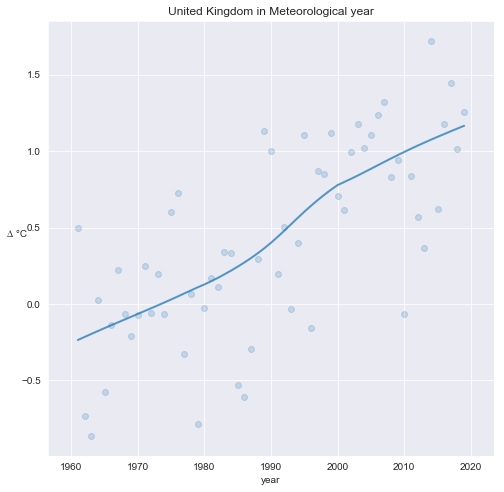

In [20]:
for month in df.months.unique():
    country_plot(UK, month)

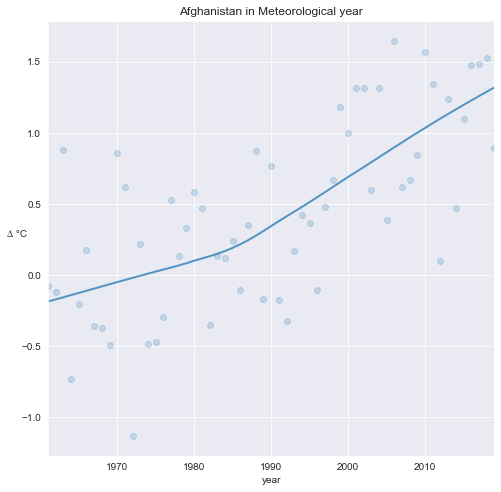

In [23]:
afg = country_df(df, 'Afghanistan')
country_plot(afg, 'Meteorological year')

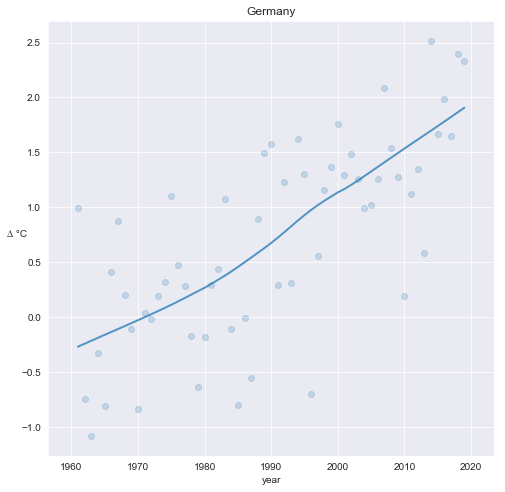

In [22]:
ger = country_df(df, 'Germany')
country_plot(ger, 'Meteorological year')

As expected we see a clear increase in temperature over the years in our sampled countries. 

# Continents Visualization

Let's zoom out and take a look at the continental temperature changes. 

In [23]:
africa = seasons_df(df, 'Africa')
asia = seasons_df(df, 'Asia')
europe = seasons_df(df, 'Europe')
north_america = seasons_df(df, 'Northern America')
south_america = seasons_df(df, 'South America')
australia = seasons_df(df, 'Australia')
antarctica = seasons_df(df, 'Antarctica')

C:\Users\triplem\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
continents_str=["Africa","Asia","Europe","Northern America","South America","Australia","Antarctica"]
continents=[africa, asia, europe, north_america, south_america, australia, antarctica]

In [25]:
 africa.head()

seasons,Winter,Spring,Summer,Fall,Meteorological year,year
Africa,,,,,,
0,0.036,0.170,-0.032,-0.243,-0.017,1961.0
1,-0.414,-0.011,-0.021,0.287,-0.040,1962.0
2,0.393,-0.455,0.118,0.198,0.064,1963.0
3,0.110,0.231,-0.434,-0.519,-0.153,1964.0
4,-0.160,-0.342,-0.111,-0.174,-0.197,1965.0


In [26]:
cont_yearly = pd.concat(continents, axis=1, ignore_index=False)
cont_yearly.drop(columns=seasons, axis=1, inplace=True)
cont_yearly.set_index(africa['year'], inplace=True)
cont_yearly.drop('year', axis=1, inplace=True)
cont_yearly.columns = continents_str
cont_yearly.head()

,Africa,Asia,Europe,Northern America,South America,Australia,Antarctica
year,,,,,,,
1961.0,-0.017,0.049,0.874,0.017,0.116,0.151,0.280
1962.0,-0.040,-0.008,0.300,-0.058,-0.139,0.123,-0.227
1963.0,0.064,0.266,0.103,0.372,0.139,-0.114,0.135
1964.0,-0.153,-0.166,-0.523,-0.285,-0.217,-0.022,-0.366
1965.0,-0.197,-0.033,-0.430,-0.594,-0.015,0.127,-0.099


In [27]:
sns.set_palette(sns.color_palette('muted', 7))
colors = sns.color_palette('muted')

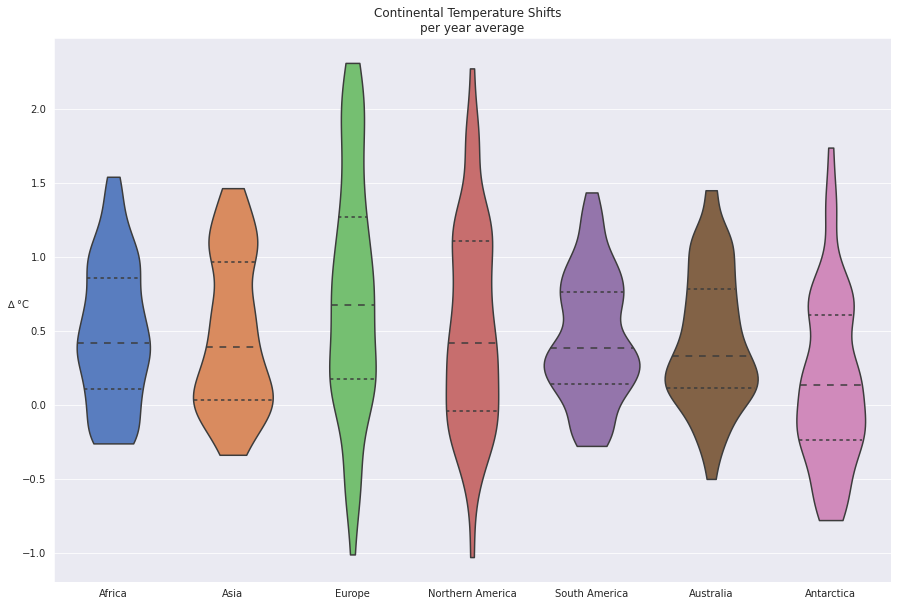

In [21]:
violins = plt.figure(figsize=(15,10))
sns.violinplot(data=cont_yearly, inner='quartile', cut=0, bw=0.3)  
plt.ylabel('∆ °C', rotation=0)
plt.title('Continental Temperature Shifts  \nper year average')
plt.show()

According to our plot, all continents have a mean temperature increase above 0, with some quartiles reaching near or above 1. 

Let's look at the continents per season.

In [22]:
def continent_season_plot(season, axes=None, subplot=False):
    if subplot == False:
        p = plt.figure(figsize=(10,10))
    for con, c in list(zip(continents, colors)):
        sns.regplot(ax=axes, data=con, x='year', y=season, fit_reg=True, lowess=True, label=con.index.name, 
                    scatter_kws={'alpha':0.2}, ci=None, color=c, line_kws={'lw':2, 'alpha':0.75})
    if subplot == False:
        plt.ylabel('∆ °C', rotation=0)
        plt.title(f'{season} ∆ Continental Temperatures')
        plt.legend(loc='best', frameon=False)
    else:
        axes.set_ylabel('∆ °C', rotation=0)
        axes.set_title(f'{season} ∆ Continental Temperatures')
        axes.legend(loc='upper left', frameon=True)

In [37]:
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


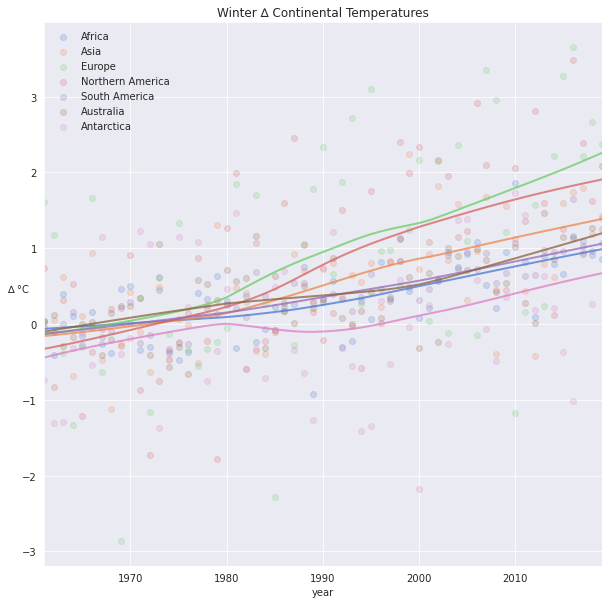

In [23]:
continent_season_plot('Winter')

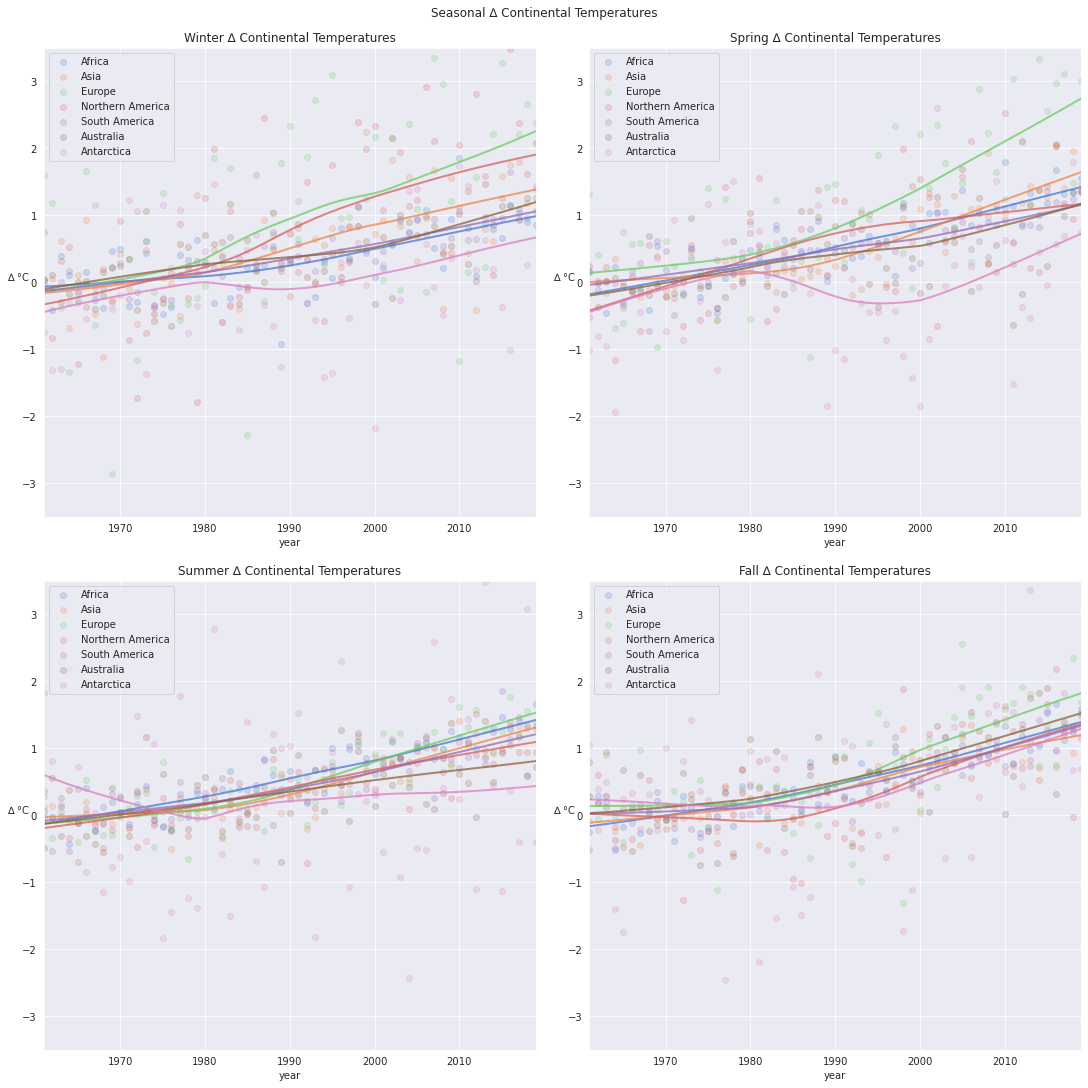

In [24]:
fig, ax = plt.subplots(2,2, constrained_layout=True, figsize=(15,15))
fig.suptitle('Seasonal ∆ Continental Temperatures')
continent_season_plot('Winter', ax[0,0], subplot=True)
ax[0,0].set_ylim(-3.5,3.5)
continent_season_plot('Spring', ax[0,1], subplot=True)
ax[0,1].set_ylim(-3.5,3.5)
continent_season_plot('Summer', ax[1,0], subplot=True)
ax[1,0].set_ylim(-3.5,3.5)
continent_season_plot('Fall', ax[1,1], subplot=True)
ax[1,1].set_ylim(-3.5,3.5)
plt.show()

Although the degree of increase varies between continents, it's clear that all have seen increasing temperatures in all seasons. Most appear to be consistently above 1°C in recent years.

# World Visualization

Now let's view the world as a whole. 

In [25]:
world = sum(continents) / 7
world.index.name = 'world'
world.head()

seasons,Winter,Spring,Summer,Fall,Meteorological year,year
world,,,,,,
0,0.238571,0.072857,0.306429,0.222000,0.210000,1961.0
1,-0.187143,-0.124000,0.082286,0.198857,-0.007000,1962.0
2,-0.091000,-0.183714,0.362571,0.463286,0.137857,1963.0
3,-0.243429,-0.449429,0.159143,-0.456143,-0.247429,1964.0
4,-0.281429,-0.132571,-0.041857,-0.253000,-0.177286,1965.0


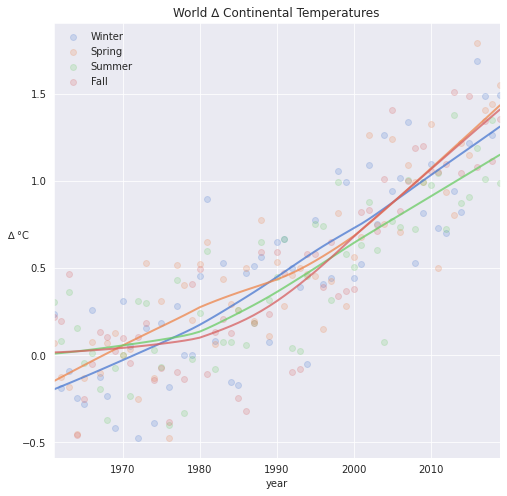

In [26]:
plt.figure(figsize=(8,8))
for s in seasons:
    sns.regplot(data=world, x='year', y=s, fit_reg=True, lowess=True, label=s, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75})
plt.gca().set_ylabel('∆ °C', rotation=0)
plt.gca().set_title('World ∆ Continental Temperatures')
plt.legend(loc='best', frameon=False)
plt.show()

As expected we see a clear increase for the world as a whole. 

In [21]:
!pip install statsmodels


distutils: c:\users\prashant tiwari\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\prashant tiwari\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\prashant tiwari\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\prashant tiwari\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\prashant tiwari\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
